# Implementing depp neural network (dnn) with sklearn

In [5]:
# Make notebook work with python 2 as well
from __future__ import print_function, division
from builtins import range

import numpy as np
import matplotlib.pyplot as plt


### Creating synthetic data

Shape of X1, X2, X3 respectively (1000, 2) (1000, 2) (1000, 2)
XX.shape = (3000, 2) , YY.shape = (3000,)
Z.shape = (3000, 3)


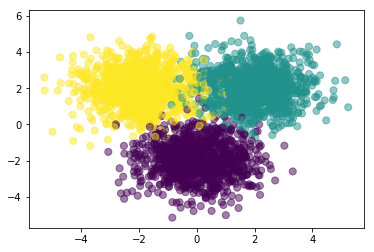

In [23]:
# Create a dataset with 3 catagories having 1000 samples each. Each sample is labeled with its catagory indicator.

# Number of samples per class
Nclass = 1000
np.random.seed(1)

X1 = np.random.randn(Nclass, 2) + np.array([0, -2]) # sift distribution center to (0, -2)
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])  # sift distribution center to (2, 2)
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2]) # sift distribution center to (-2, 2)
print("Shape of X1, X2, X3 respectively", X1.shape, X2.shape, X3.shape)

# Vertically stack these samples to create dataset of 1500 samples.
XX = np.vstack([X1, X2, X3])

# Populate labels for all samples
YY = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
print("XX.shape =", XX.shape, ", YY.shape =", YY.shape)

Z = np.hstack( (XX, YY.reshape(XX.shape[0], 1)) ) # pass a tuple
# shuffle it
np.random.shuffle(Z)
print("Z.shape =", Z.shape)

# let's see what it looks like
plt.scatter(Z[:,0], Z[:,1], c=Z[:,2], s=50, alpha=0.5)
plt.show()


### DNN classifier with sklearn

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

# get the data
X, Y = Z[:, :-1], Z[:, 2].astype(np.int32)
Xtrain, Ytrain = X[:-500], Y[:-500]
Xtest, Ytest = X[-500:], Y[-500:]

# create the neural network
model = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=500)

# train the neural network
model.fit(Xtrain, Ytrain)

# print the train and test accuracy
train_accuracy = model.score(Xtrain, Ytrain)
test_accuracy = model.score(Xtest, Ytest)
print("train accuracy:", train_accuracy, "test accuracy:", test_accuracy)

train accuracy: 0.972 test accuracy: 0.97
